# problem statement
- predict the diabetes  with the given features

##### In india there were 101 million people effected with diabetes
##### india ranked second place in diabetes all over the world ,then i decide to train model to predict the diabetes

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:

# reading file
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [77]:
# checking columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [78]:
# checking datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
# dataframe shape
df.shape

(768, 9)

In [80]:
# cheking null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# observations :
- Ther are no null values

In [81]:
# finding min,max and  median and  mean and std, count
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [82]:
# cheking duplicate files
df. duplicated(keep="first").sum()

0

In [83]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Exploratory data analysis
## univariate anaysis

In [84]:
#  function visualization
def univariate(df):
  for i in df.columns:
    print("*"*10,i,"*")
    sns.boxplot(x=i,data=df)
    plt.title(f"boxplot plot of {i}")
    plt.show()


    print("*"*10,i,"*"*10)

    df[i].plot(kind="hist")
    plt.title(f"histogram plot of {i}")
    plt.show()

    print("*"*10,i,"*"*10)

    df[i].plot(kind="kde")
    plt.title(f"density plot of {i}")
    plt.show()

    des_ = df[i].describe().T
    print(des_)

    skew_ =df[i].skew()
    print("skewness",skew_)

    kurt_ =df[i].kurt()
    print("kurtosis",kurt_)



********** Pregnancies *


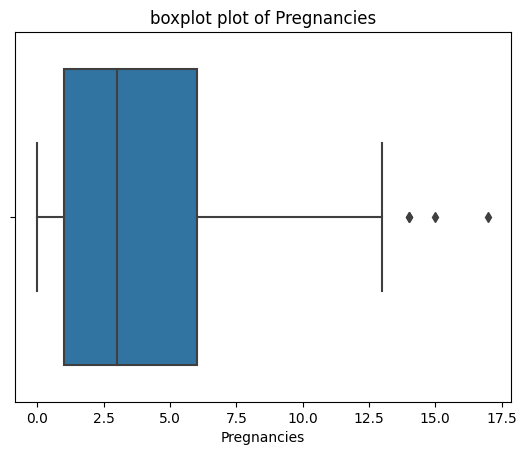

********** Pregnancies **********


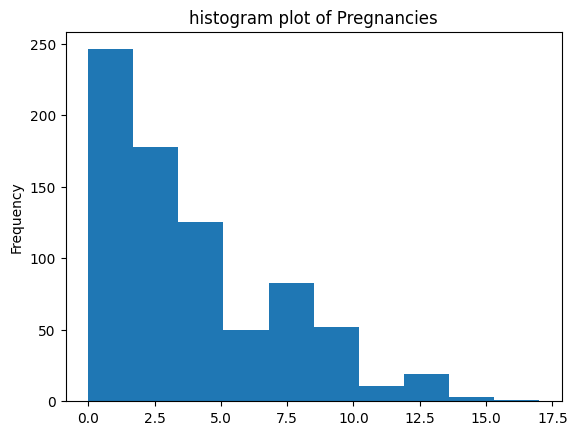

********** Pregnancies **********


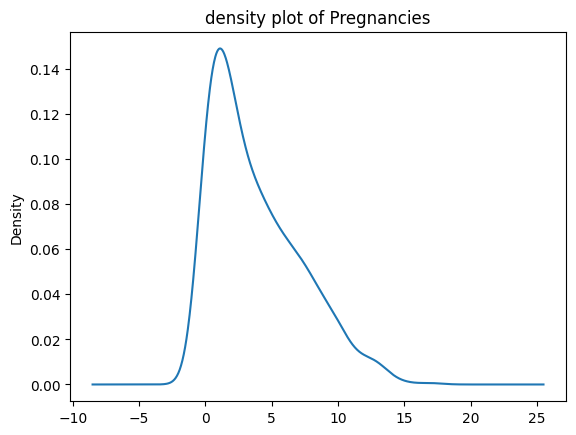

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
skewness 0.9016739791518588
kurtosis 0.15921977754746486
********** Glucose *


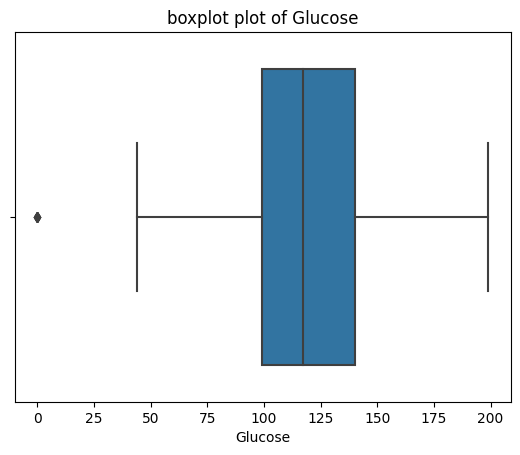

********** Glucose **********


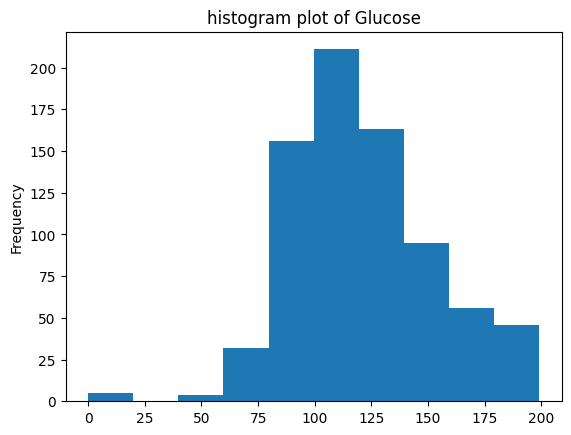

********** Glucose **********


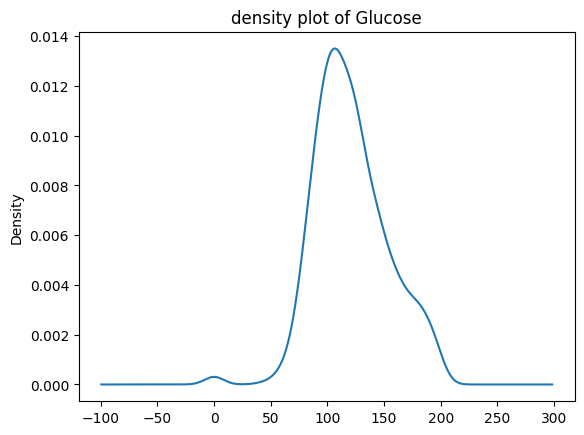

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
skewness 0.17375350179188992
kurtosis 0.6407798203735053
********** BloodPressure *


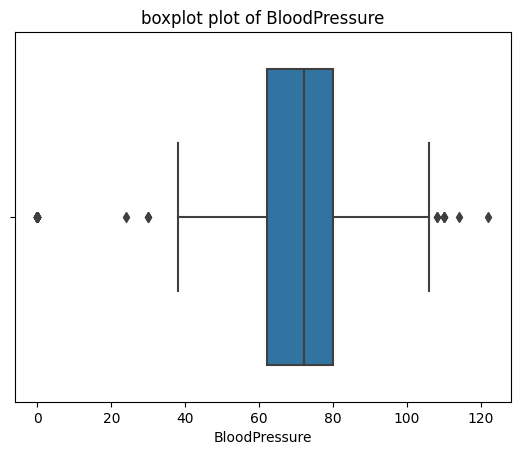

********** BloodPressure **********


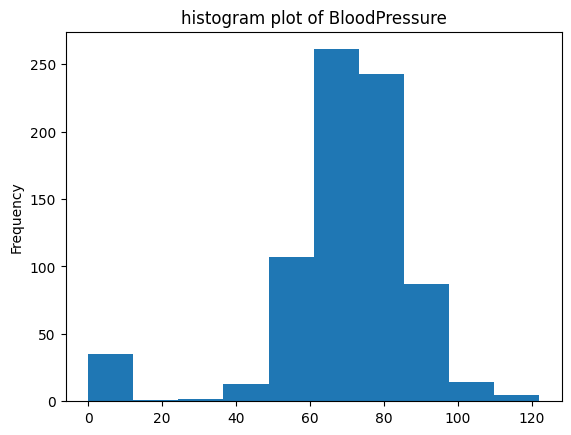

********** BloodPressure **********


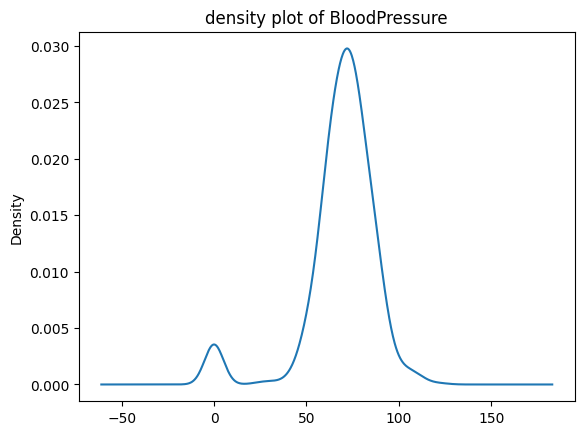

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
skewness -1.8436079833551302
kurtosis 5.180156560082496
********** SkinThickness *


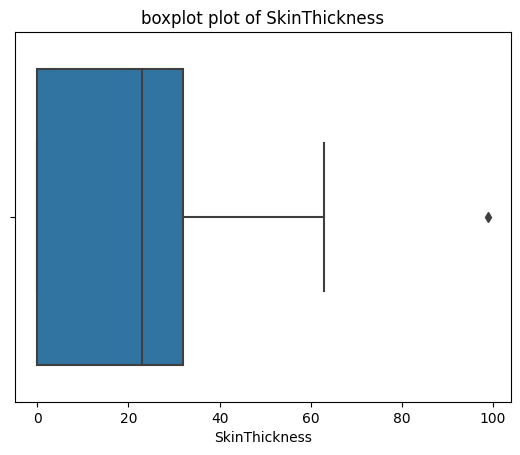

********** SkinThickness **********


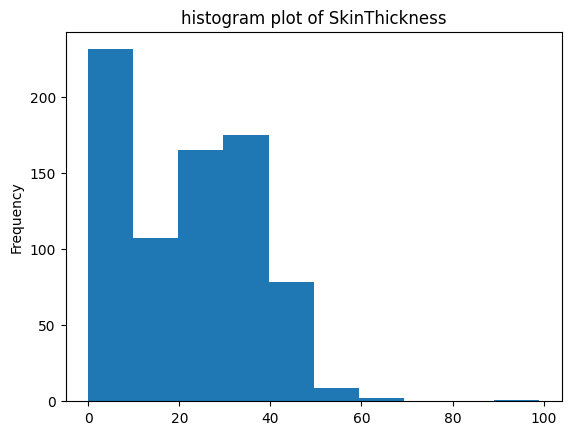

********** SkinThickness **********


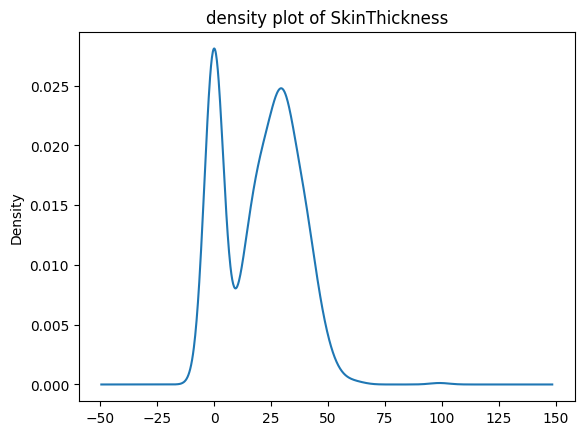

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
skewness 0.10937249648187608
kurtosis -0.520071866153013
********** Insulin *


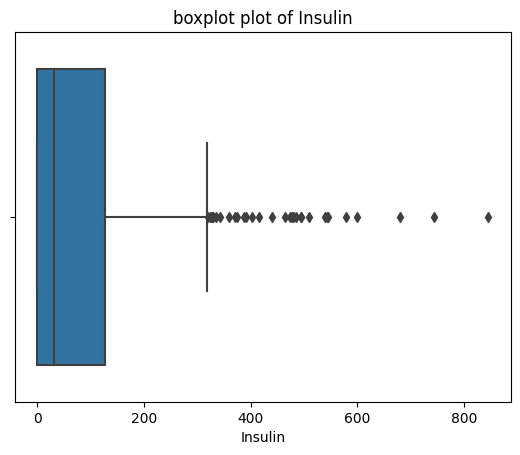

********** Insulin **********


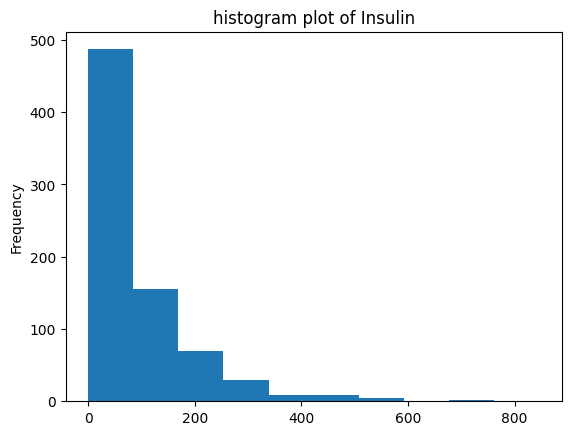

********** Insulin **********


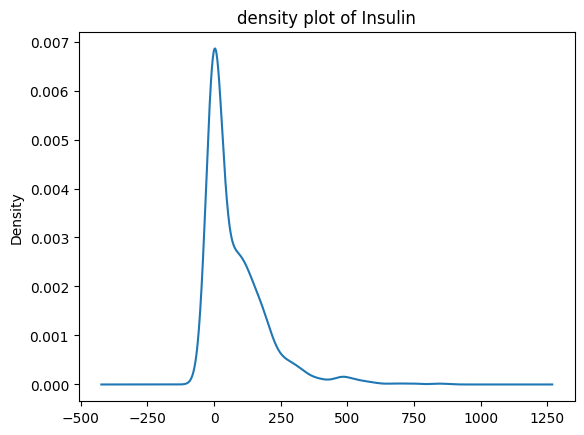

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
skewness 2.272250858431574
kurtosis 7.2142595543487715
********** BMI *


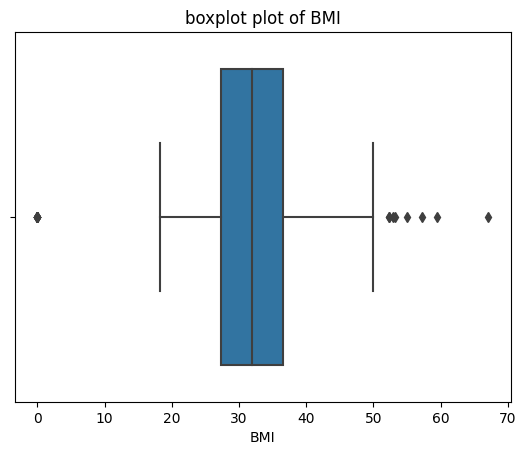

********** BMI **********


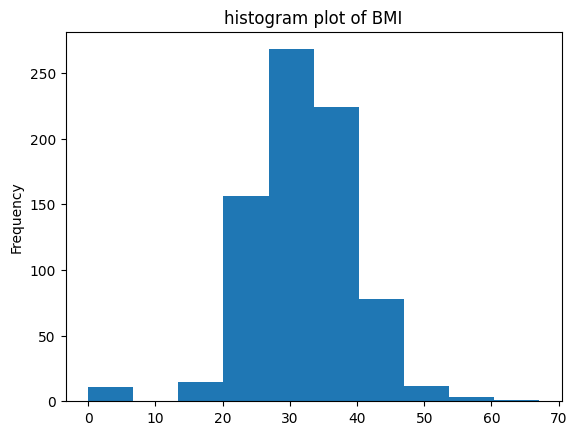

********** BMI **********


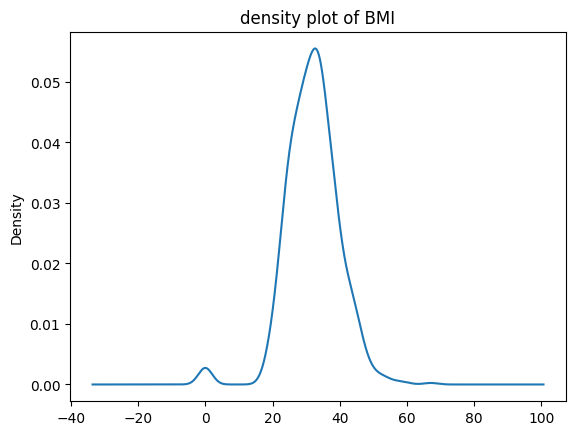

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
skewness -0.42898158845356543
kurtosis 3.290442900816981
********** DiabetesPedigreeFunction *


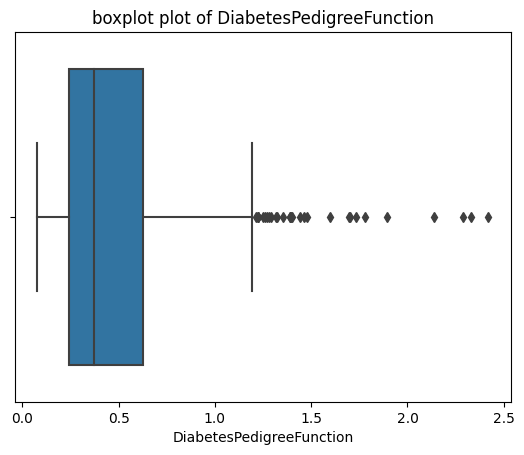

********** DiabetesPedigreeFunction **********


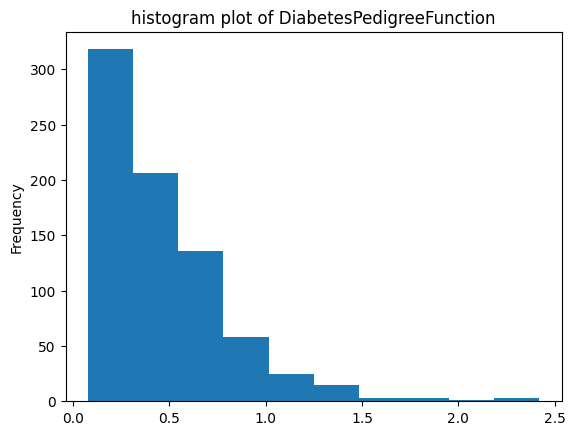

********** DiabetesPedigreeFunction **********


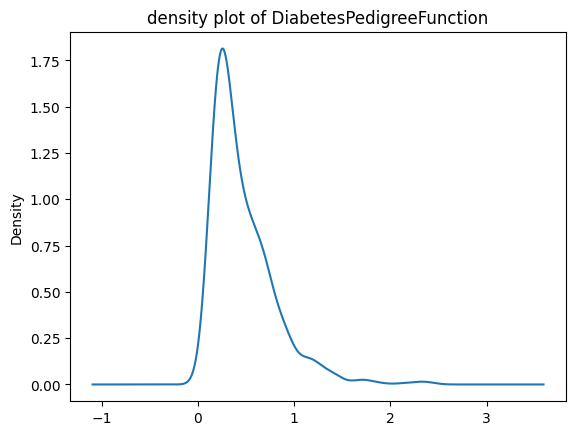

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
skewness 1.919911066307204
kurtosis 5.5949535279830584
********** Age *


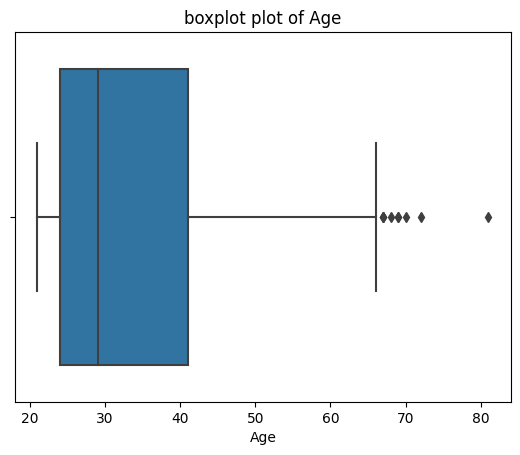

********** Age **********


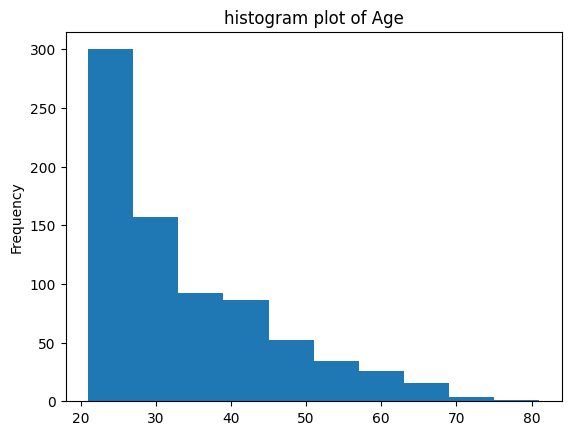

********** Age **********


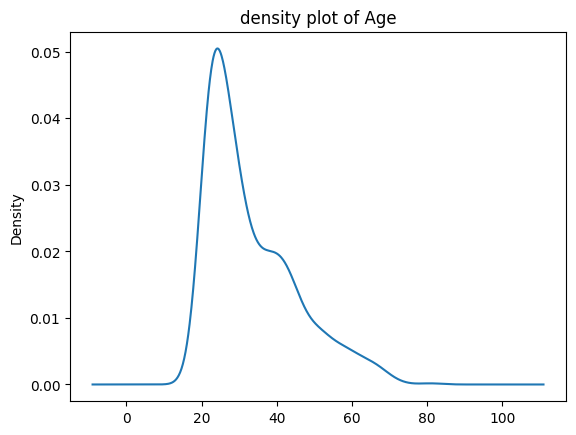

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
skewness 1.1295967011444805
kurtosis 0.6431588885398942
********** Outcome *


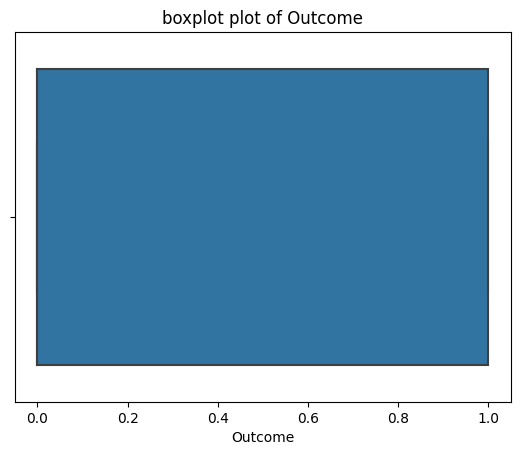

********** Outcome **********


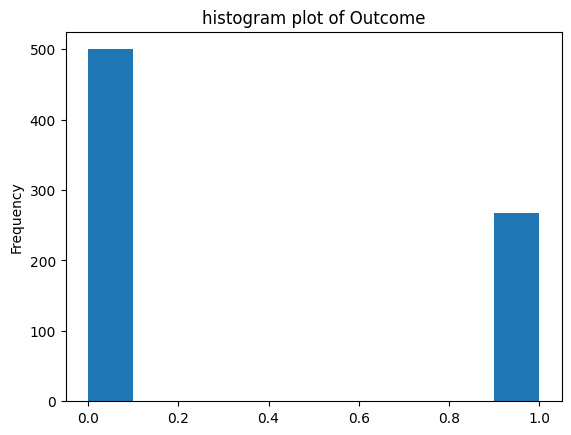

********** Outcome **********


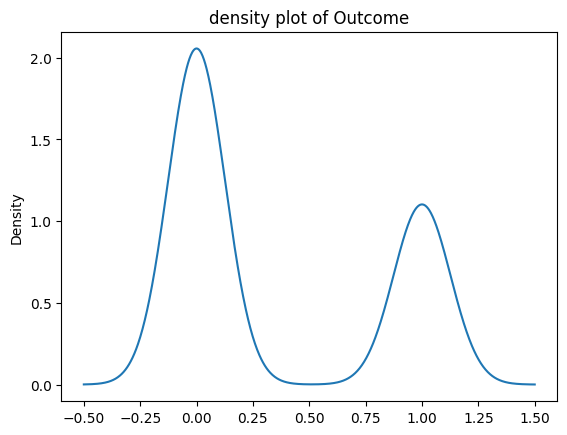

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64
skewness 0.635016643444986
kurtosis -1.600929755156027


In [85]:
# visual univariate analysis
univariate(df)

In [86]:
# statistical way to  represent the outliers
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [87]:
# kurtosis shows the tailness of the distribution
# numbers indicate the outlier
df.kurt()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

In [88]:
# outliers detection # only  stores the first column
def outlier_detection(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3-q1

  # lower boundary
  l = q1-(1.5*iqr)
  # upper boundary
  u = q3+(1.5*iqr)
  outliers =df[(df[col]<l)| (df[col]>u)]
  return outliers

In [89]:
# outliers detection
def outlier_detection_all(df):
  for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1

    # lower boundary
    l = q1-(1.5*iqr)
    # upper boundary
    u = q3+(1.5*iqr)
    outliers =df[(df[i]<l)| (df[i]>u)]
    print( outliers)
    print("*"*50)
    print(f"count of outlies {i}",len(outliers))
    print("*"*50)

In [90]:
out =outlier_detection_all(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
**************************************************
count of outlies Pregnancies 4
**************************************************
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68    

In [91]:
# outliers detection in columns
outlier_detection(df,"Pregnancies")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [92]:
outlier_detection(df,"Glucose")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [93]:
outlier_detection(df,"BloodPressure")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
43,9,171,110,24,240,45.4,0.721,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0


In [94]:
len(outlier_detection(df,"BloodPressure"))

45

In [95]:
outlier_detection(df,"Insulin")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [96]:
len(outlier_detection(df,"Insulin"))  # 34 outliers in the insulin column

34

In [97]:
outlier_detection(df,"BMI")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
145,0,102,75,23,0,0.0,0.572,21,0
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0


In [98]:
len(outlier_detection(df,"BMI"))

19

In [99]:
outlier_detection(df,"DiabetesPedigreeFunction")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [100]:
len(outlier_detection(df,"DiabetesPedigreeFunction"))

29

In [101]:
outlier_detection(df,"Age")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [102]:
len(outlier_detection(df,"Age"))

9

In [103]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# observation
- There are 145 outliers in the dataframe
- In BMI  19
- In Age 9
- In DiabetesPedigreeFunction 29
- In Insulin 34
- In Glouose 5
- In pregnanies 4
- In Bp 45


In [104]:
# outliers removing
def outlier_deletion(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3-q1

  # lower boundary
  l = q1-(1.5*iqr)
  # upper boundary
  u = q3+(1.5*iqr)
  df=df[(df[col]>l)&(df[col]<u)]
  return df

In [105]:
df=outlier_deletion(df,"BloodPressure") # removing outliers in bp
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [106]:
df=outlier_deletion(df,"DiabetesPedigreeFunction")
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [107]:
df=outlier_deletion(df,"Insulin")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# bi variate analysis betwen to num features


In [108]:
def min_max(df):
  for i in df.columns:
    print(i,"min")
    print(df[i].min())

    print(i,"max")
    print(df[i].max())



In [109]:
# range of all features
min_max(df)

Pregnancies min
0
Pregnancies max
17
Glucose min
0
Glucose max
198
BloodPressure min
38
BloodPressure max
106
SkinThickness min
0
SkinThickness max
99
Insulin min
0
Insulin max
321
BMI min
0.0
BMI max
57.3
DiabetesPedigreeFunction min
0.078
DiabetesPedigreeFunction max
1.191
Age min
21
Age max
81
Outcome min
0
Outcome max
1


In [110]:
# bi variate analysis
clo2 = df["Outcome"]
for i in df.columns:
  def scatter(df,col1,col2):
    print("*"*15,i,"*"*15)
    sns.scatterplot(x=df[col1],y=df[col2])
    plt.title(f"scatter plot of {col1,col2}")
    plt.show()

*************** Outcome ***************


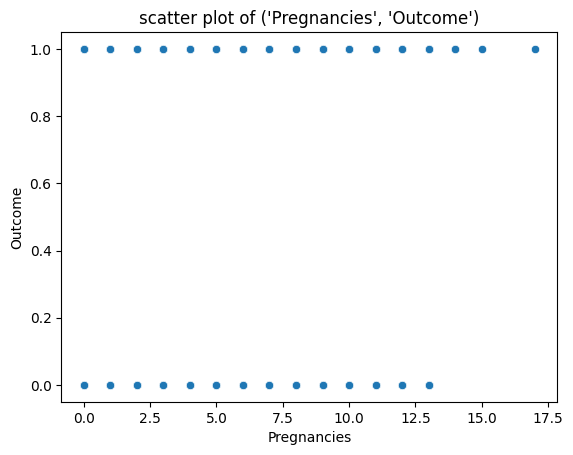

In [111]:
scatter(df,"Pregnancies","Outcome")

*************** Outcome ***************


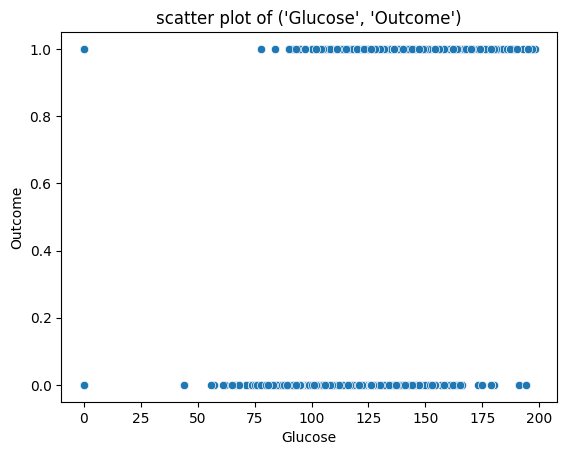

In [112]:
scatter(df,"Glucose","Outcome")

*************** Outcome ***************


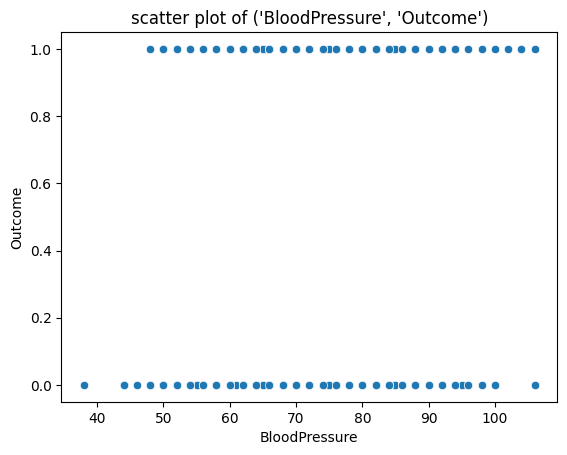

In [113]:
scatter(df,"BloodPressure","Outcome")

*************** Outcome ***************


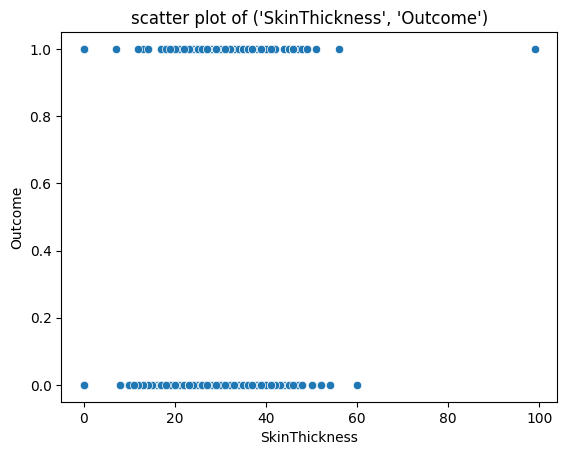

In [114]:
scatter(df,"SkinThickness","Outcome")

*************** Outcome ***************


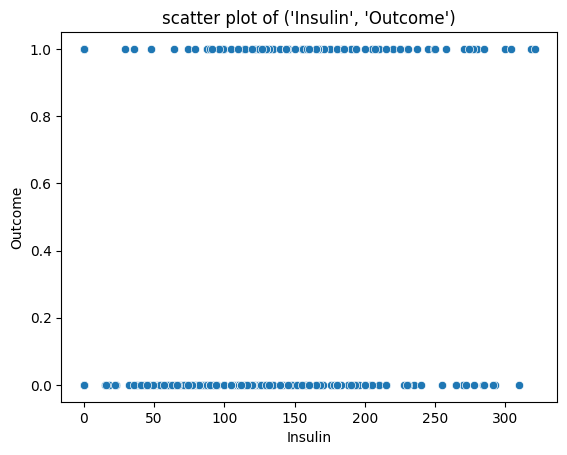

In [115]:
scatter(df,"Insulin","Outcome")

*************** Outcome ***************


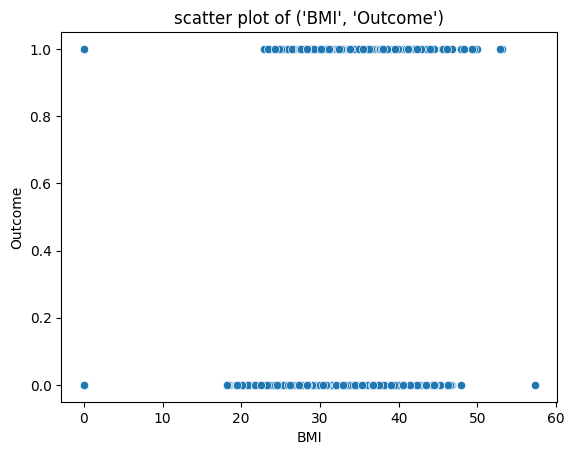

In [116]:
scatter(df,"BMI","Outcome")

*************** Outcome ***************


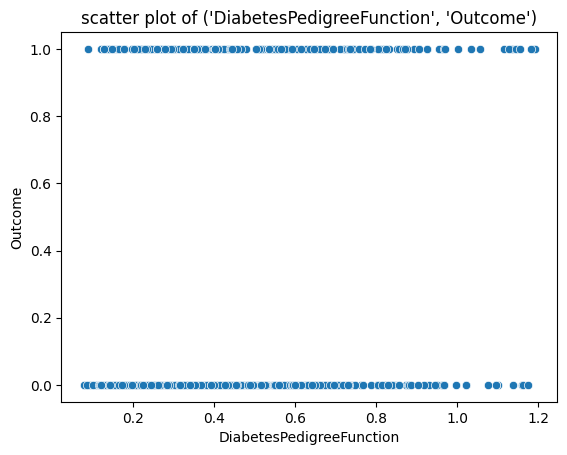

In [117]:
scatter(df,"DiabetesPedigreeFunction","Outcome")

In [ ]:
scatter(df,"Age","Outcome")

In [ ]:
df["Outcome"].value_counts().plot(kind="barh")
plt.title("the predicted values indicates")

In [ ]:
sns.countplot(x=df["Outcome"])
plt.title("target features counts")
plt.show()

In [ ]:
df["Outcome"].value_counts(normalize=True) # for in percentage

In [ ]:
df["Outcome"].value_counts()

# observations:
 - In the 60%  are non diabetic people 500
 - There are 268 are diabetic holders are presented in data

In [ ]:
sns.scatterplot(x="Pregnancies",y="BloodPressure",hue="Outcome",data=df)


In [ ]:
# non visual visual bi variate analysis
df.corr()

# observations :
- The age and Pregnancies  positive corelation with 0.54
- THe Glucose and  outcomes have positive corelation each other 0.46

# building model to predict the diabetes

In [ ]:
# identify  input and output features
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
y.head()

In [ ]:
y.value_counts()

In [ ]:
# split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state =0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
# data preprocessing of train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train),
                                columns=X_train.columns,
                                index=X_train.index)
X_train_rescaled.head()

# logisticregression algorithm

In [ ]:
# building model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_rescaled,y_train)

In [ ]:
# predictions on train data
y_train_pred = reg.predict(X_train_rescaled)

In [ ]:
# evalution of the train data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_train,y_train_pred)

In [ ]:
# preprocesing of test data
X_test_rescaled = pd.DataFrame(scaler.transform(X_test),
                               columns=X_test.columns,
                               index=X_test.index)
X_test_rescaled.head()

In [ ]:
# prediction
y_test_predi_l =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score",metrics.accuracy_score(y_test,y_test_predi_l))
print("accauracy_score",metrics.classification_report(y_test,y_test_predi_l))


# KNN algorithm

In [ ]:
# building model
from sklearn.neighbors import KNeighborsClassifier
reg = KNeighborsClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_knn=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_knn))
# prediction on test data
y_test_predi_k =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score of test data",metrics.accuracy_score(y_test,y_test_predi_k))
print("accauracy_score of test data",metrics.classification_report(y_test,y_test_predi_k))


# decision tree algorithm


In [ ]:
# building model
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(max_depth=3) # max depth is hyperparameter
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_dt=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data of dt  ",accuracy_score(y_train,y_train_pred_dt))

# prediction
y_test_predi_d =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score of dt",metrics.accuracy_score(y_test,y_test_predi_d))
print("accauracy_score of dt",metrics.classification_report(y_test,y_test_predi_d))


# support vector  algorithm

In [ ]:
# building model
from sklearn.svm import SVC
reg = SVC()
reg.fit(X_train_rescaled,y_train)


# prediction on train data
y_train_pred_svc=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_svc))

# prediction
y_test_predi_s =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_scaore of svc",metrics.accuracy_score(y_test,y_test_predi_s))
print("accauracy_scaore svc ",metrics.classification_report(y_test,y_test_predi_s))


# naive bayes algorithm

In [ ]:
# building model
from sklearn.naive_bayes import GaussianNB
reg = GaussianNB()
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_nb=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_nb))

# prediction
y_test_predi_nb =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score of nb",metrics.accuracy_score(y_test,y_test_predi_nb))
print("accauracy_score of nb",metrics.classification_report(y_test,y_test_predi_nb))


# ensemble algorithms
## random forest algorithm

In [ ]:
# building model
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_rf=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_rf))

# prediction
y_test_predi_r =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score of rf",metrics.accuracy_score(y_test,y_test_predi_r))
print("accauracy_score of rf",metrics.classification_report(y_test,y_test_predi_r))


# adaboost algorithm

In [ ]:
# building model
from sklearn.ensemble import AdaBoostClassifier
reg = AdaBoostClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_adb=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_adb))

# prediction
y_test_predi_a =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score of ada boost",metrics.accuracy_score(y_test,y_test_predi_a))
print("accauracy_score ada boost",metrics.classification_report(y_test,y_test_predi_a))


# gbdt algorithm

In [ ]:
# building model
from sklearn.ensemble import GradientBoostingClassifier
reg = GradientBoostingClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction on train data
y_train_pred_gbdt=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_gbdt))

# prediction
y_test_predi_g =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score gbdt",metrics.accuracy_score(y_test,y_test_predi_g))
print("accauracy_score gbdt ",metrics.classification_report(y_test,y_test_predi_g))


# Xgboost algorithm

In [ ]:
# building model
from sklearn.ensemble import ExtraTreesClassifier
reg = ExtraTreesClassifier()
reg.fit(X_train_rescaled,y_train)

# prediction on yttrain data
y_train_pred_xg=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_xg))

# prediction on yttrain data
y_train_pred_knn=reg.predict(X_train_rescaled)
# evalution of the train data
print("train data ",accuracy_score(y_train,y_train_pred_knn))
# prediction
y_test_predi_g =reg.predict(X_test_rescaled)
from sklearn import metrics
print("accauracy_score xg",metrics.accuracy_score(y_test,y_test_predi_g))
print("accauracy_score xg",metrics.classification_report(y_test,y_test_predi_g))


# feature importance

In [ ]:
reg.feature_importances_

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
s =plot_tree(reg,feature_names=X_train_rescaled.columns,
             class_names =["0","1"],
             filled = True,
             rounded = True,
             fontsize = 15)

# feature selection with decision tree

<Axes: >

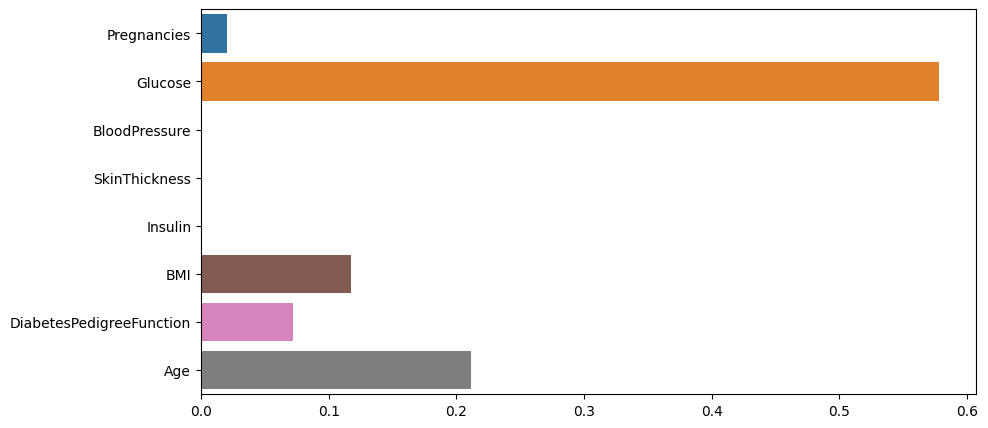

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x = reg.feature_importances_,y=X_train_rescaled.columns)

# observations :
- The above  plot show the most important feature of given the data
- The Glucose most important feature a to compare with others feature
- Age and Bmi are also important features to predict the diabetes